In [1]:
import numpy as np
from matplotlib import pylab as plt
import wave
import struct
from scipy import signal

Must execute the following block to keep matplotlib notebook graphs in in frame.
source: Medium One @


https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [3]:
'''
Function sinewave:
    Generate a sinewave.

inputs:
    freq = the frequency of wave to produce
    numSamples = how many samples to create. 48k as default (1 second)
    sampleRate = sampleRate of the signal. 48k by default for audio
    
returns: a sine wave   
'''
def sinewave(freq, numSamples = 48000, sampleRate=48000):
    sinewave = np.arange(numSamples)
    sinewave = np.sin(2 * np.pi * freq * (sinewave/sampleRate))
    return sinewave


'''
Function fftBandPass:
    Apply a FFT-based bandpass filter to some data.

inputs:
    sig = input signal
    lower = beginning of bandpass window
    upper = end of bandpass window
    weight = value to multiply filtered data. 0 by default
    
returns: the filtered signal    
'''
def fftBandPass(sig, lower, upper, weight = 0.0):
    freqs = np.fft.fft(sig)
    freqs[0:lower] *= weight
    freqs[upper:] *= weight
#     out = []
#     for i in range(0,len(freqs)):
#         if i < lower or i > upper:
#             out.append(freqs[i]*weight)
#         else: 
#             out.append(freqs[i])    
    return(np.fft.ifft(freqs))


'''
Function fftBandStop:
    Apply a FFT-based bandstop filter to some data.

inputs:
    sig = input signal
    lower = beginning of bandstop window
    upper = end of bandstop window
    weight = value to multiply filtered data. 0 by default
    
returns the filtered signal    
'''
def fftBandStop(sig, lower, upper, weight = 0.0):
    freqs = np.fft.fft(sig)
    freqs[lower:upper] *= weight
#     out = []
#     for i in range(0,len(freqs)):
#         if i < lower or i > upper:
#             out.append(freqs[i])    
#         else: 
#             out.append(freqs[i]*weight)
    return (np.fft.ifft(freqs))  


'''
Function bandPass:
    Apply a Butterworth bandpass filter to some data.

inputs:
    sig = input signal
    lower = beginning of bandpass window
    upper = end of bandpass window
    sampleRate = rate to sample data. 48k by default for audio
    order = order of filter. 3 by default
    
returns the filtered signal    
'''
def bandPass(sig,low,high,sampleRate = 48000,order = 3):
    #low and high must be a fraction of the nyquist frequency, which is half the sample rate
    sos = signal.butter(order, [low/(0.5*sampleRate), high/(0.5*sampleRate)], btype='bandpass', output='sos')
    return signal.sosfilt(sos,sig)

'''
Function bandStop:
    Apply a Butterworth bandStop filter to some data.

inputs:
    sig = input signal
    lower = beginning of bandstop window
    upper = end of bandstop window
    sampleRate = rate to sample data. 48k by default for audio
    order = order of filter. 3 by default
    
returns the filtered signal    
'''
def bandStop(sig,low,high,sampleRate = 48000,order = 3):
    sos = signal.butter(order, [low/(0.5*sampleRate), high/(0.5*sampleRate)], btype='bandstop', output='sos')
    return signal.sosfilt(sos,sig)


'''
Function lowPass:
    Apply a Butterworth lowpass filter to some data.

inputs:
    sig = input signal
    wn = the critical frequency
    sampleRate = rate to sample data. 48k by default for audio
    order = order of filter. 3 by default
    
returns the filtered signal    
'''

def lowPass(sig, wn,  sampleRate = 48000,order = 3):
    sos = signal.butter(order, wn/(0.5*sampleRate), btype='lowpass', output='sos')
    return signal.sosfilt(sos,sig)
                          
                          
'''
Function highPass:
    Apply a Butterworth highpass filter to some data.

inputs:
    sig = input signal
    wn = the critical frequency
    sampleRate = rate to sample data. 48k by default for audio
    order = order of filter. 3 by default
    
returns the filtered signal    
'''
def highPass(sig, wn, sampleRate = 48000,order = 3):
    sos = signal.butter(order, wn/(0.5*sampleRate), btype='highpass', output='sos')
    return signal.sosfilt(sos,sig)


C:\Users\Mattster\Desktop\test\WPy64-3741\python-3.7.4.amd64\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Frequency')

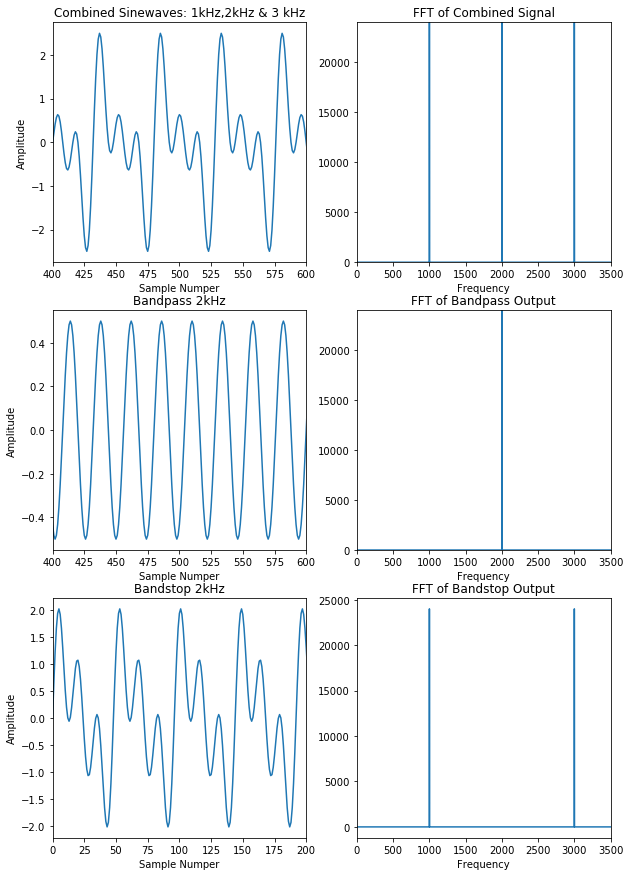

In [4]:
'''
Combine 3 sine waves and filter them using the FFT-based
filters. Store waves and FFTs to be graphed
'''
waves = sinewave(1000)+sinewave(2000)+sinewave(3000)
bandPassWaves = fftBandPass(waves,1900,2100) 
bandStopWaves = fftBandStop(waves,1900,2100) 
fft_waves = np.abs(np.fft.fft(waves))
fft_bandPassWaves = np.abs(np.fft.fft(bandPassWaves))
fft_bandStopWaves = np.abs(np.fft.fft(bandStopWaves))

plt.figure(figsize=[10,15])

plt.subplot(3,2,1)
plt.plot(waves)
plt.title("Combined Sinewaves: 1kHz,2kHz & 3 kHz")
plt.xlim(400,600)
plt.xlabel("Sample Numper")
plt.ylabel("Amplitude")

plt.subplot(3,2,2)
plt.plot(fft_waves)
plt.title("FFT of Combined Signal")
plt.xlim(0,3500)
plt.ylim(0,np.max(fft_waves))
plt.xlabel("Frequency")

plt.subplot(3,2,3)
plt.plot(bandPassWaves)
plt.title("Bandpass 2kHz")
plt.xlim(400,600)
plt.xlabel("Sample Numper")
plt.ylabel("Amplitude")

plt.subplot(3,2,4)
plt.plot(fft_bandPassWaves)
plt.title("FFT of Bandpass Output")
plt.xlim(0,3500)
plt.ylim(0,np.max(fft_bandPassWaves))
plt.xlabel("Frequency")


plt.subplot(3,2,5)
plt.plot(bandStopWaves)
plt.title("Bandstop 2kHz")
plt.xlim(0,200)
plt.xlabel("Sample Numper")
plt.ylabel("Amplitude")

plt.subplot(3,2,6)
plt.plot(np.abs(np.fft.fft(bandStopWaves)))
plt.title("FFT of Bandstop Output")
plt.xlim(0,3500)
plt.xlabel("Frequency")


In [5]:
'''
Use Wave to open a .wav file. Unpack it to a readable format,
a 16-bit sequence stored in S. ex1.wav contains a 440 Hz tone
with some white noise in the background.
Source: https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/
'''
file = wave.open("C:\\Users\\Mattster\\Desktop\\Audacity\\noisy.wav", "r")
x = file.readframes(48000)
s = struct.unpack('{n}h'.format(n=48000), x)


<IPython.core.display.Javascript object>


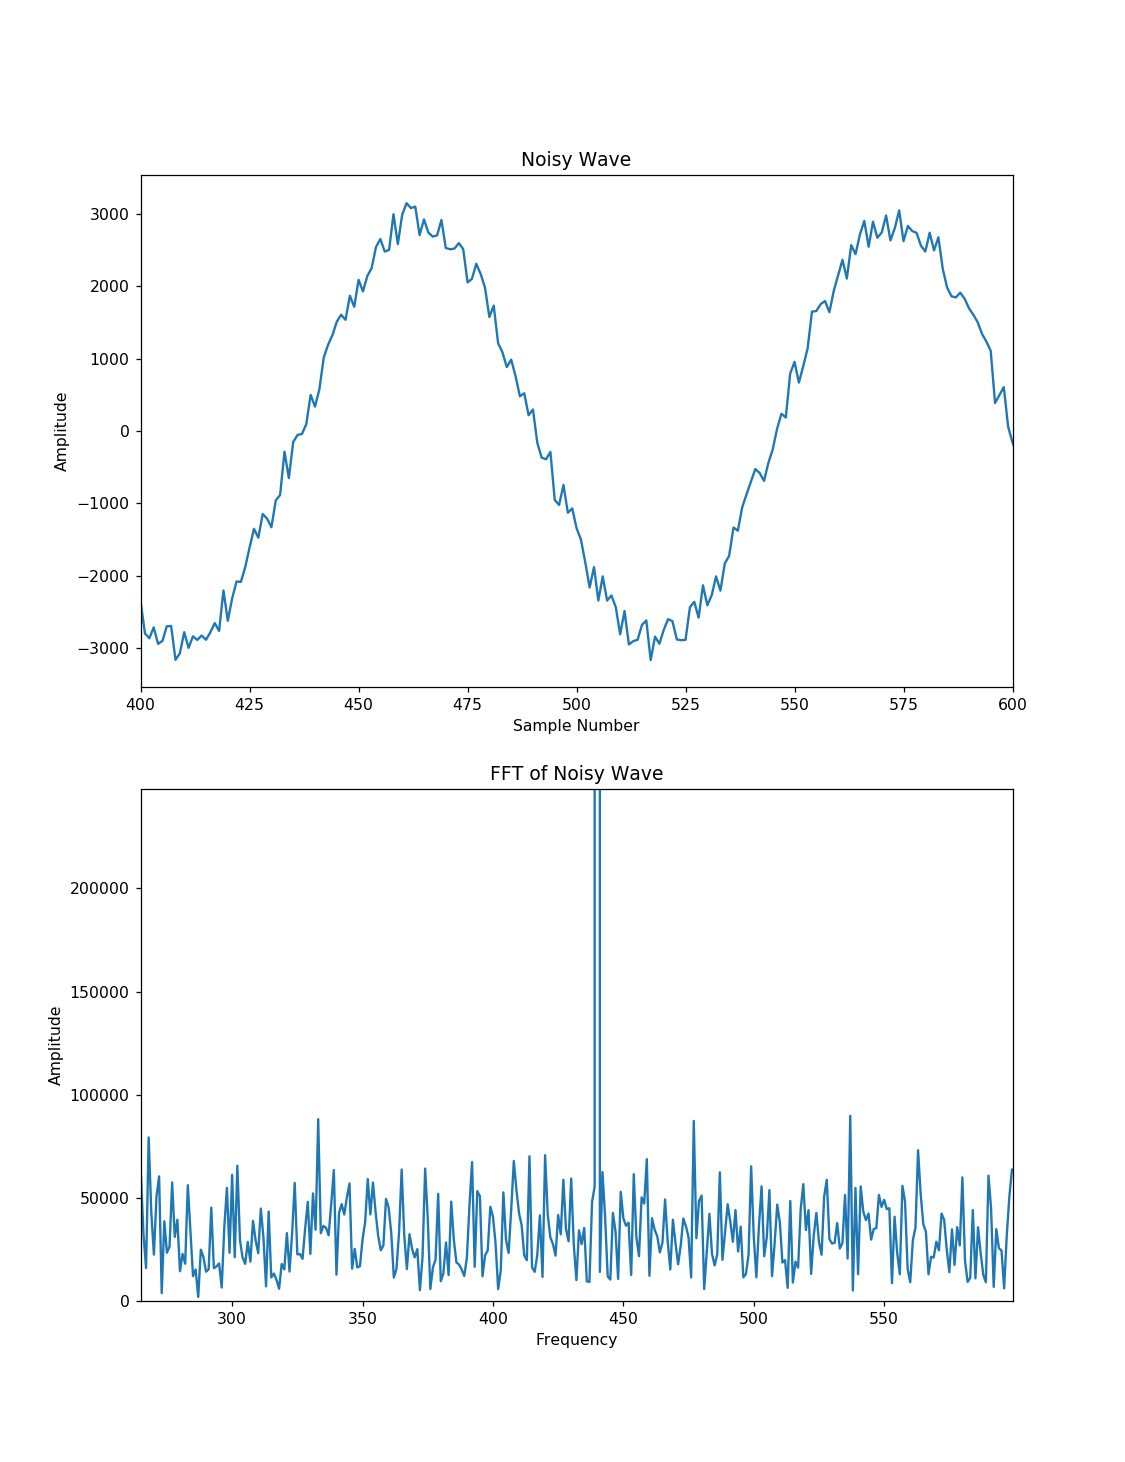

Text(0, 0.5, 'Amplitude')

In [12]:
# store fft of the signal, plot signal and frequencies
s_fft = np.abs(np.fft.fft(s))

%matplotlib notebook
plt.figure(figsize=[10,13])
plt.subplot(2,1,1)
plt.plot(s)
plt.title("Noisy Wave")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.xlim(400,600)
plt.subplot(2,1,2)
plt.plot(s_fft)
plt.title("FFT of Noisy Wave")
plt.xlim(0,1000)
plt.ylim(0,np.max(s_fft))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

<IPython.core.display.Javascript object>


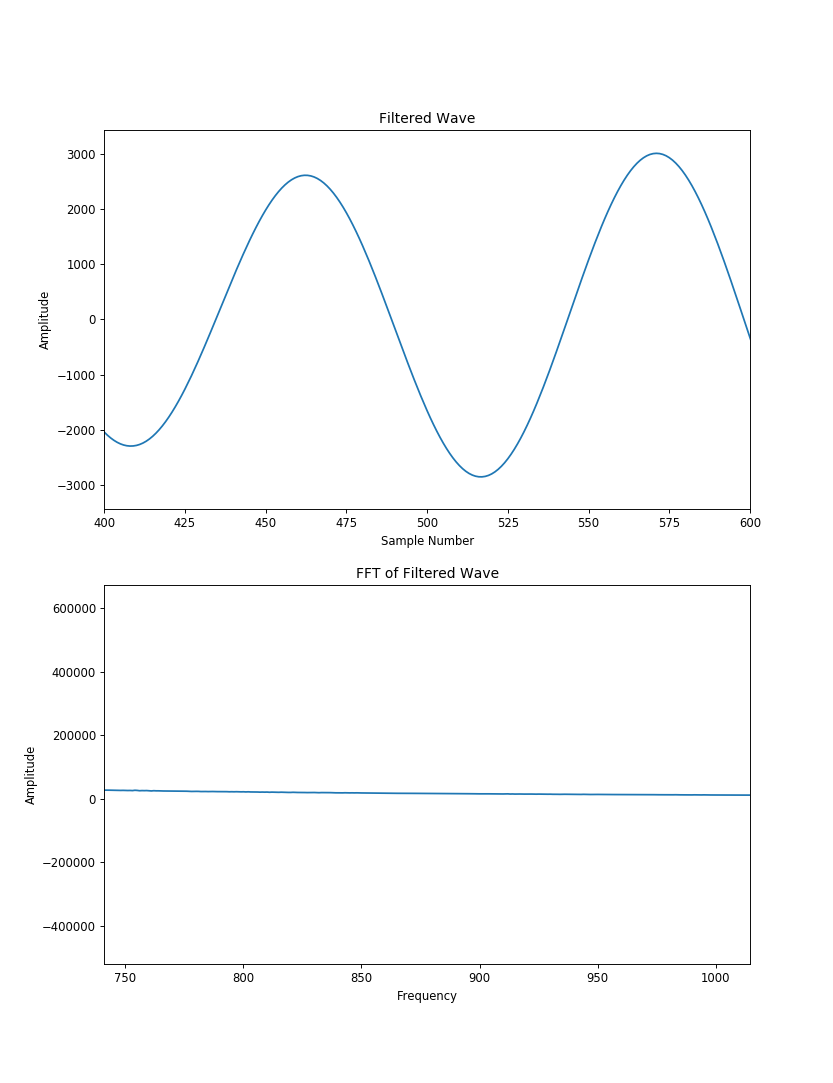

Text(0, 0.5, 'Amplitude')

In [13]:
'''
Use defined methods to apply Buttorworth filters
to the data. This example is a bandpass to remove
the noise from the 440 Hz tone
'''
sf = bandPass(s,390,500)

sf_fft = np.abs(np.fft.fft(sf))

%matplotlib notebook
plt.figure(figsize=[10,13])

plt.subplot(2,1,1)
plt.plot(sf)
plt.title("Filtered Wave")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.xlim(400,600)

plt.subplot(2,1,2)
plt.plot(sf_fft)
plt.title("FFT of Filtered Wave")
plt.xlim(0,1000)
plt.ylim(0,np.max(sf_fft))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

In [8]:
# write the filtered output to bandPass.wav
file = wave.open("C:\\Users\\Mattster\\Desktop\\Audacity\\bandPass.wav", "w")
file.setparams((1,2,48000,48000,"NONE",""))
               
for n in sf:
    file.writeframes(struct.pack('h', int(n)))
    

<IPython.core.display.Javascript object>


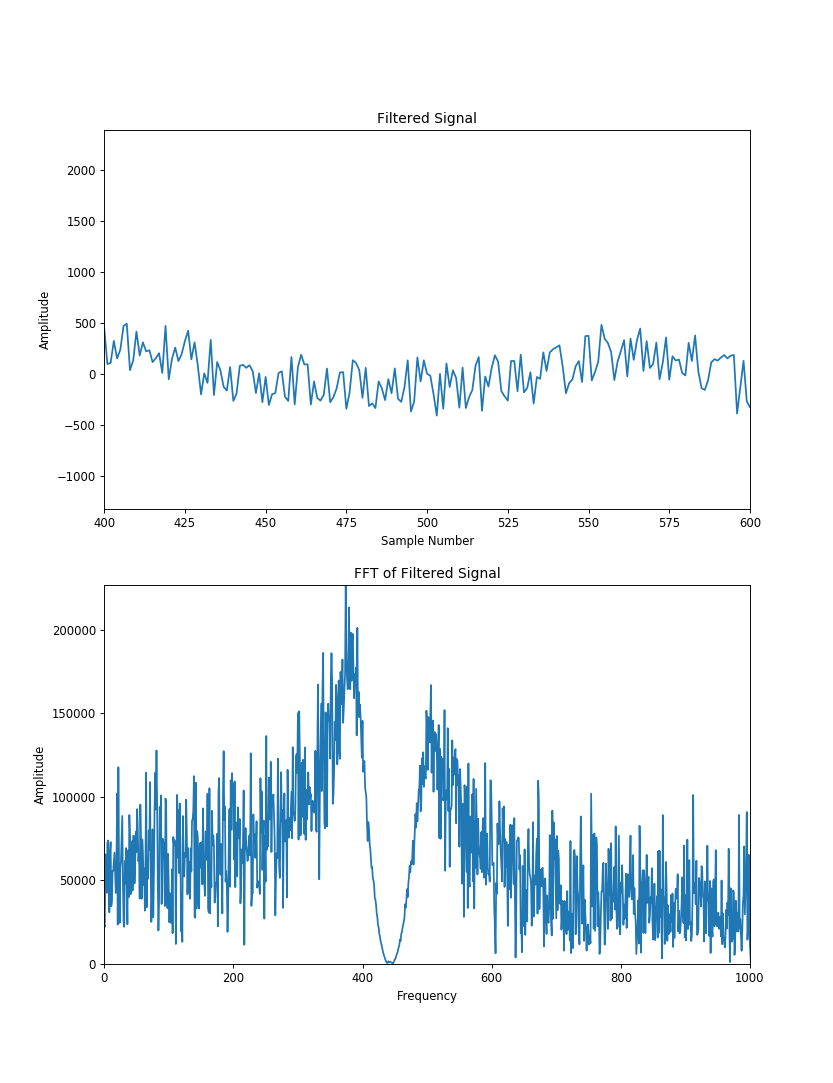

Text(0, 0.5, 'Amplitude')

In [14]:
'''
Use defined methods to apply Buttorworth filters
to the data. This example is a bandstop to remove
the 440Hz tone but keep the noise
'''

sf = bandStop(s,390,500)
sf_fft = np.abs(np.fft.fft(sf))

plt.figure(figsize=[10,13])

plt.subplot(2,1,1)
plt.plot(sf)
plt.title("Filtered Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.xlim(400,600)

plt.subplot(2,1,2)
plt.plot(sf_fft)
plt.title("FFT of Filtered Signal")
plt.xlim(0,1000)
plt.ylim(0,np.max(sf_fft))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

In [10]:
# Write the filtered output to bandStop.wav
file = wave.open("C:\\Users\\Mattster\\Desktop\\Audacity\\bandStop.wav", "w")
file.setparams((1,2,48000,48000,"NONE",""))
               
for n in sf:
    file.writeframes(struct.pack('h', int(n)))
    

In [11]:
import time
# Perform a timing comparison of the fft Bandpass and Butterworth Bandpass
# Combine two sinewaves for 60 seconds, pass 1000 Hz

myWave = sinewave(1000,numSamples=60*48000) + sinewave(2000,numSamples=60*48000) 
t0 = time.time()
fftBandPass(myWave,900,1100)
t1 = time.time()
total = t1-t0
print("fftBandpass of 60 second signal took\t\t %.5f seconds"%total)
t0 = time.time()
bandPass(myWave,900,1100)
t1 = time.time()
total = t1-t0
print("Butterworth Bandpass of 60 second signal took\t %.5f seconds"%total)

fftBandpass of 60 second signal took		 0.46899 seconds
Butterworth Bandpass of 60 second signal took	 0.10174 seconds
